<a href="https://colab.research.google.com/github/gameOfBranches/firstRepo/blob/main/Credit_Card_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
!pip install kaggle
from google.colab import files
files.upload()  # Upload kaggle.json
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d rikdifos/credit-card-approval-prediction

Dataset URL: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction
License(s): CC0-1.0
 75% 4.00M/5.32M [00:01<00:00, 5.27MB/s]
100% 5.32M/5.32M [00:01<00:00, 4.87MB/s]


In [4]:
!unzip credit-card-approval-prediction.zip

Archive:  credit-card-approval-prediction.zip
  inflating: application_record.csv  
  inflating: credit_record.csv       


In [32]:
application_data_df = pd.read_csv("application_record.csv")
credit_data_df = pd.read_csv("credit_record.csv")

# We have two records connected by ID column

print(application_data_df.head())
print(credit_data_df.head())

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005 

In [33]:
print("Unique IDs in application data", application_data_df.nunique())
print("Unique IDs in credit data", credit_data_df.nunique())

Unique IDs in application data ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64
Unique IDs in credit data ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64


In [34]:
credit_data_df.isna().sum()

,0
ID,0
MONTHS_BALANCE,0
STATUS,0


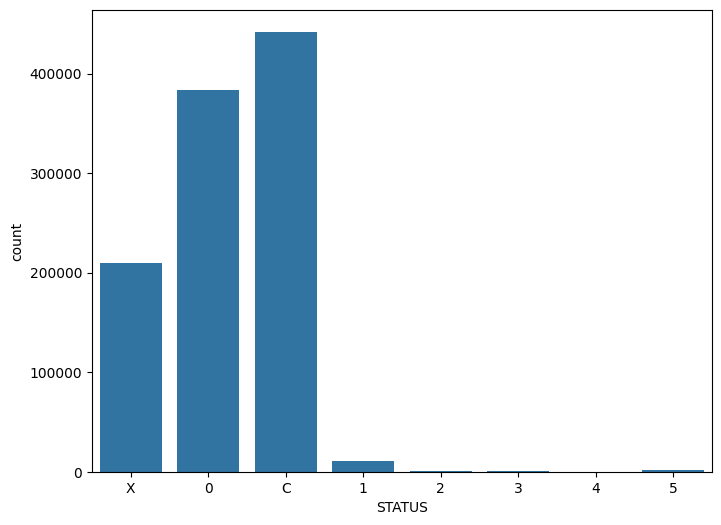

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(x=credit_data_df['STATUS'])
plt.show()

In [35]:
credit_data_df['approved'] = "no"
credit_data_df.loc[credit_data_df['STATUS'].isin(['X','C','0']), 'approved'] = "yes"
credit_data_df.sample(10)

,ID,MONTHS_BALANCE,STATUS,approved
672103,5091357,-4,C,yes
616646,5079222,-42,C,yes
249345,5022871,-26,C,yes
109119,5009766,-26,C,yes
186133,5016894,-50,0,yes
566610,5067552,-17,X,yes
408136,5048076,-58,0,yes
150088,5011863,-7,C,yes
734373,5100224,-19,X,yes
296639,5028402,-25,0,yes


In [36]:
credit_data_df['approved'].value_counts()

,count
approved,
yes,1034381
no,14194


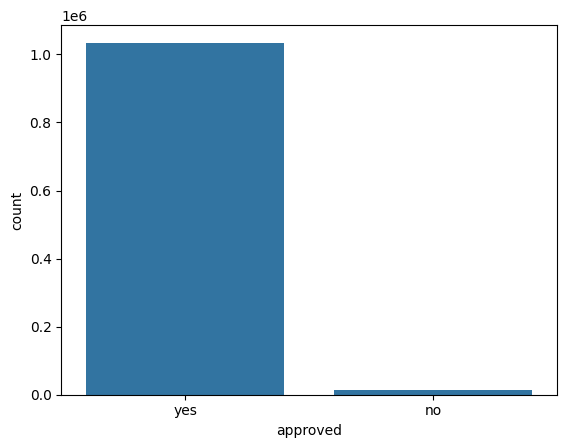

In [37]:
sns.countplot(x=credit_data_df['approved'])
plt.show()

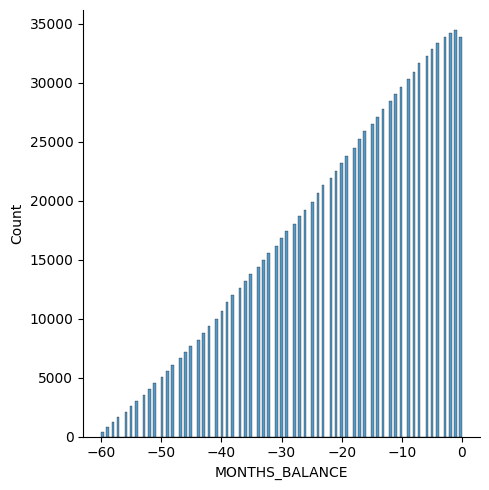

In [38]:
sns.displot(credit_data_df['MONTHS_BALANCE'])
plt.show()

In [39]:
df_approved = credit_data_df[['ID', 'approved']]
print(df_approved.sample(10))

              ID approved
707117   5095973      yes
559690   5067215      yes
382802   5045533      yes
136721   5011314      yes
476455   5059873      yes
186192   5016896      yes
616263   5079195      yes
244037   5022549      yes
1017812  5148489      yes
21103    5002683      yes


In [40]:
df_approved['label'] = 0
df_approved.loc[df_approved['approved'] == "yes", 'label'] = 1
print(df_approved.sample(10))

<ipython-input-40-c3c6ded416c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_approved['label'] = 0


             ID approved  label
154747  5012102      yes      1
570157  5067757      yes      1
986719  5142744      yes      1
607680  5078727      yes      1
582143  5068476      yes      1
193080  5017200      yes      1
615525  5079160      yes      1
459233  5054465      yes      1
618749  5085687      yes      1
338511  5036580      yes      1


In [41]:
df_approved.drop('approved', axis=1, inplace=True)
df_approved.sample(10)

<ipython-input-41-89e8461f6c3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_approved.drop('approved', axis=1, inplace=True)


,ID,label
376826,5044677,1
1008578,5145974,1
207670,5017834,1
460712,5054564,1
990793,5142938,1
887333,5121332,1
417798,5050535,1
738448,5100461,1
86832,5005620,1
1013598,5146385,1


In [42]:
df_approved.isna().sum()

,0
ID,0
label,0


In [43]:
application_data_df.isna().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [44]:
merged_df = pd.merge(application_data_df, df_approved, on = 'ID', how='inner')
merged_df.sample(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,label
356626,5066993,F,Y,Y,0,225000.0,Working,Secondary / secondary special,Married,House / apartment,-21217,-1557,1,0,0,1,Accountants,2.0,1
471675,5091918,F,N,N,3,103500.0,Working,Secondary / secondary special,Married,With parents,-13674,-4491,1,0,0,0,Laborers,5.0,1
639071,5118600,M,N,Y,1,315000.0,Commercial associate,Secondary / secondary special,Separated,House / apartment,-16606,-3506,1,0,0,0,Managers,2.0,1
397475,5069383,F,N,Y,0,112500.0,Working,Higher education,Married,House / apartment,-12924,-2058,1,0,1,0,Sales staff,2.0,1
375612,5067990,F,Y,N,2,315000.0,Working,Secondary / secondary special,Married,Rented apartment,-12209,-840,1,0,1,1,NaN,4.0,1
751815,5149259,M,Y,N,2,157500.0,Working,Secondary / secondary special,Married,House / apartment,-14842,-5189,1,0,1,0,Drivers,4.0,1
635413,5118377,F,N,N,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20495,365243,1,0,1,0,NaN,2.0,1
64731,5022672,M,Y,Y,0,157500.0,Commercial associate,Secondary / secondary special,Single / not married,Municipal apartment,-9862,-2135,1,1,0,0,Laborers,1.0,1
374152,5067924,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-22743,365243,1,0,0,0,NaN,1.0,1
296532,5056159,F,N,Y,0,216000.0,Working,Secondary / secondary special,Married,House / apartment,-18067,-6517,1,1,1,1,High skill tech staff,2.0,1


In [45]:
merged_df.dropna(axis=0, inplace=True)
merged_df.isna().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [46]:
y = merged_df['label']
x = merged_df.drop(['ID', 'label'], axis=1)

In [48]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537667 entries, 31 to 777714
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          537667 non-null  object 
 1   FLAG_OWN_CAR         537667 non-null  object 
 2   FLAG_OWN_REALTY      537667 non-null  object 
 3   CNT_CHILDREN         537667 non-null  int64  
 4   AMT_INCOME_TOTAL     537667 non-null  float64
 5   NAME_INCOME_TYPE     537667 non-null  object 
 6   NAME_EDUCATION_TYPE  537667 non-null  object 
 7   NAME_FAMILY_STATUS   537667 non-null  object 
 8   NAME_HOUSING_TYPE    537667 non-null  object 
 9   DAYS_BIRTH           537667 non-null  int64  
 10  DAYS_EMPLOYED        537667 non-null  int64  
 11  FLAG_MOBIL           537667 non-null  int64  
 12  FLAG_WORK_PHONE      537667 non-null  int64  
 13  FLAG_PHONE           537667 non-null  int64  
 14  FLAG_EMAIL           537667 non-null  int64  
 15  OCCUPATION_TYPE      

In [50]:
categorical_columns = x.select_dtypes(include = 'object').columns
numerical_columns = x.select_dtypes(exclude = 'object').columns
print(categorical_columns, numerical_columns)

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE'],
      dtype='object') Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS'],
      dtype='object')


In [54]:
to_label = []
to_one_hot = []
to_binary = []
for i in categorical_columns:
  if x[i].nunique() <= 2:
    to_label.append(i)
  elif x[i].nunique() <= 5:
    to_one_hot.append(i)
  else:
    to_binary.append(i)

print("to_label", to_label)
print("to_one_hot", to_one_hot)
print("to_binary", to_binary)

to_label ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
to_one_hot ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS']
to_binary ['NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']


In [55]:
x[categorical_columns].nunique()

,0
CODE_GENDER,2
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
NAME_INCOME_TYPE,5
NAME_EDUCATION_TYPE,5
NAME_FAMILY_STATUS,5
NAME_HOUSING_TYPE,6
OCCUPATION_TYPE,18


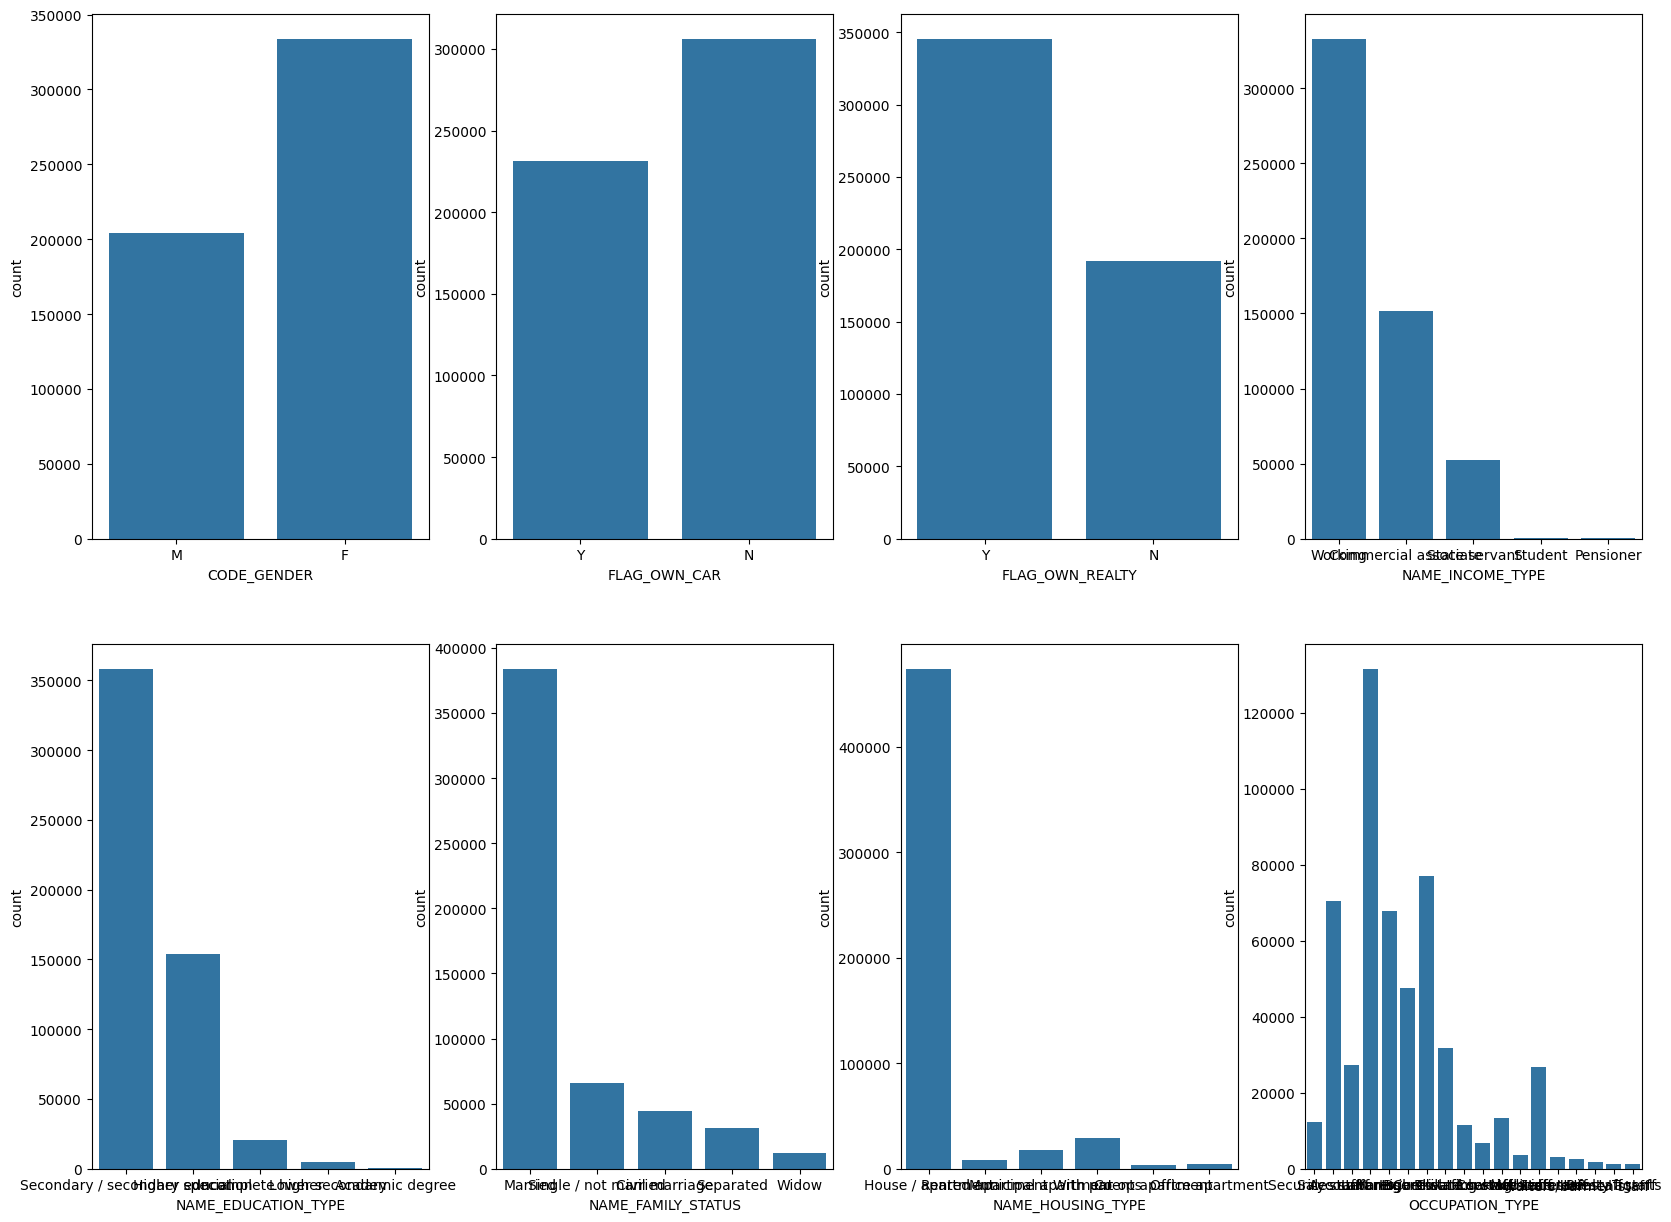

In [57]:
plt.figure(figsize=(20,15))
for column, i in zip(categorical_columns, range(8)):
  plt.subplot(2,4,i+1)
  sns.countplot(x=x[column])
plt.show()

In [58]:
x_copy = x.copy()

In [59]:
!pip install category_encoders
from category_encoders import BinaryEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00


In [64]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [69]:
for i in to_label:
  x_copy[i] = LabelEncoder().fit_transform(x_copy[i])

In [84]:
ohe = OneHotEncoder()
one_hot_data = ohe.fit_transform(x_copy[to_one_hot])

In [85]:
one_hot_data

<537667x15 sparse matrix of type '<class 'numpy.float64'>'
	with 1613001 stored elements in Compressed Sparse Row format>

In [90]:
x_copy[ohe.get_feature_names_out(to_one_hot)] = one_hot_data.toarray()

In [91]:
x_copy.drop(to_one_hot, axis=1, inplace=True)

In [92]:
binary_data = BinaryEncoder().fit_transform(x_copy[to_binary])
binary_data

,NAME_HOUSING_TYPE_0,NAME_HOUSING_TYPE_1,NAME_HOUSING_TYPE_2,OCCUPATION_TYPE_0,OCCUPATION_TYPE_1,OCCUPATION_TYPE_2,OCCUPATION_TYPE_3,OCCUPATION_TYPE_4
31,0,0,1,0,0,0,0,1
32,0,0,1,0,0,0,0,1
33,0,0,1,0,0,0,0,1
34,0,0,1,0,0,0,0,1
35,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
777710,0,1,0,0,0,1,0,0
777711,0,1,0,0,0,1,0,0
777712,0,1,0,0,0,1,0,0
777713,0,1,0,0,0,1,0,0


In [93]:
x_copy[binary_data.columns] = binary_data.values

In [95]:
x_copy.drop(to_binary, axis=1, inplace=True)

In [97]:
x_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537667 entries, 31 to 777714
Data columns (total 35 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   CODE_GENDER                                        537667 non-null  int64  
 1   FLAG_OWN_CAR                                       537667 non-null  int64  
 2   FLAG_OWN_REALTY                                    537667 non-null  int64  
 3   CNT_CHILDREN                                       537667 non-null  int64  
 4   AMT_INCOME_TOTAL                                   537667 non-null  float64
 5   DAYS_BIRTH                                         537667 non-null  int64  
 6   DAYS_EMPLOYED                                      537667 non-null  int64  
 7   FLAG_MOBIL                                         537667 non-null  int64  
 8   FLAG_WORK_PHONE                                    537667 non-null  int64  
 9

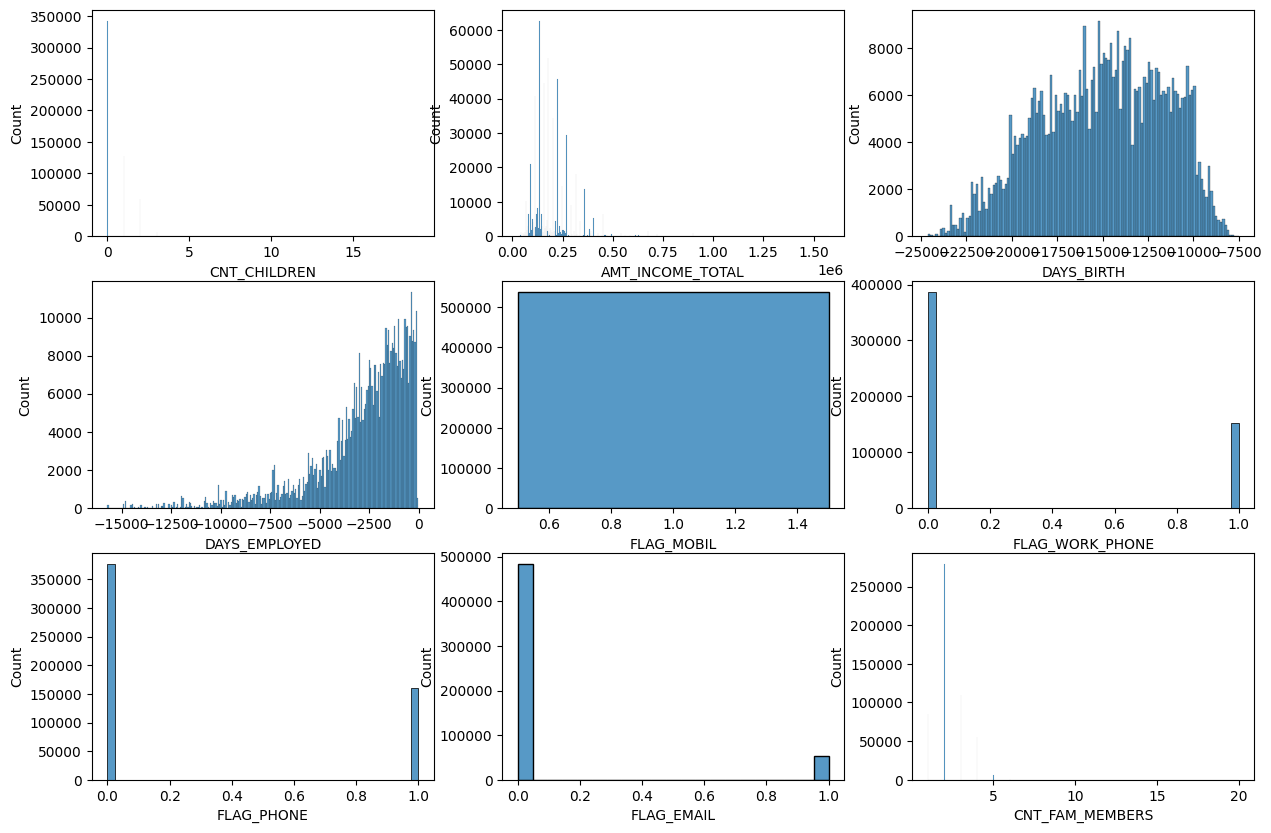

In [102]:
plt.figure(figsize=(15,10))

for col, i in zip(numerical_columns, range(len(numerical_columns))):
  plt.subplot(3, 3, i+1)
  sns.histplot(x_copy[col])

plt.show()